In [ ]:
import copy
import time
import random
import datetime
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    MaxPooling2D, AveragePooling2D, GlobalAvgPool2D
)

from tensorflow.keras.datasets import mnist



# LOAD LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

#전처리
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# How to check if Keras is using GPU?

from keras import backend as K

from keras.optimizers import SGD, Adam, Nadam

In [ ]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

In [ ]:
origin_train = pd.read_csv('./drive/My Drive/ml_data/mental/train.csv', index_col=0)
origin_test = pd.read_csv('./drive/My Drive/ml_data/mental/test_x.csv', index_col=0)
origin_submission = pd.read_csv('./drive/My Drive/ml_data/mental/sample_submission.csv', index_col=0)

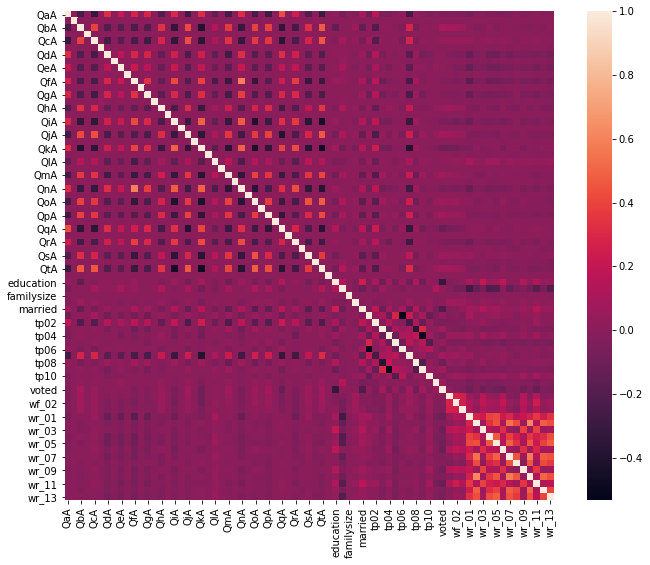

In [ ]:
corrmat = origin_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

In [ ]:
corrmat['voted'].sort_values()

for item in corrmat['voted'].sort_values().iteritems():
  print(item)

('education', -0.3198989684839204)
('married', -0.21448881239803083)
('QqA', -0.12330570957699026)
('wr_11', -0.11673405710358101)
('wr_01', -0.10785747627553742)
('wr_06', -0.10247659461402997)
('tp08', -0.09938369629225453)
('wr_03', -0.09777436709264806)
('wr_05', -0.09407538565838247)
('QkA', -0.08946708281182736)
('wr_09', -0.0880971999274251)
('wr_04', -0.07016370851790957)
('tp04', -0.06542172299137995)
('tp06', -0.06023129339330241)
('wr_13', -0.058433438493920534)
('QiA', -0.05705570726829909)
('tp02', -0.05612675276963826)
('QnA', -0.050793112245471485)
('wr_12', -0.046494843125711754)
('wr_10', -0.03968016921055191)
('QaA', -0.03881970389818615)
('wf_03', -0.03794650565891542)
('wr_02', -0.03546793857284422)
('wr_07', -0.034028707014541706)
('QrA', -0.03172324867629432)
('QfA', -0.030308866701189843)
('QgA', -0.023765070910855196)
('wr_08', -0.02139247664315233)
('tp10', -0.019270172677264948)
('wf_02', -0.01895286068340736)
('QcE', -0.012660604452948872)
('QsE', -0.01093213

In [ ]:
drop_val = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE','QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']

train = origin_train.drop(drop_val, axis = 1)
test = origin_test.drop(drop_val, axis = 1)

In [ ]:
onehot = OneHotEncoder()
label = LabelEncoder()

train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

X_train = pd.get_dummies(train, columns=['gender_code','age_group_code','race_code','religion_code'])
X_test = pd.get_dummies(test, columns=['gender_code','age_group_code','race_code','religion_code'])

In [ ]:
drop2 = ['gender','age_group','race','religion']
X_train = X_train.drop(drop2, axis = 1)
X_test = X_test.drop(drop2, axis = 1)

In [ ]:
y_train = X_train['voted'] - 1
X_train = X_train.drop(['voted'], axis = 1)

In [ ]:
X_train.shape

(45532, 80)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
input_tensor = Input(shape=(80,))
x = layers.Dense(64, activation='relu')(input_tensor)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
block_1_output = layers.Dropout(0.3)(x)

x = layers.Dense(64, activation='relu')(block_1_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Dense(64, activation='relu')(block_2_output)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Dense(128, activation='relu')(block_3_output)
x = layers.Dropout(0.3)(x)
output_tensor = layers.Dense(2, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()
model.compile(
    # optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    # optimizer='adam',
    optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
    loss="sparse_categorical_crossentropy",
    # metrics=["accuracy"]
    metrics=["accuracy"]
)

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
dense_63 (Dense)                (None, 64)           5184        input_9[0][0]                    
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 64)           4160        dense_63[0][0]                   
__________________________________________________________________________________________________
dense_65 (Dense)                (None, 64)           4160        dense_64[0][0]                   
______________________________________________________________________________________

In [ ]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=50
)

Epoch 1/50
996/996 [==============================] - 3s 3ms/step - loss: 0.6286 - accuracy: 0.6408 - val_loss: 0.5809 - val_accuracy: 0.6859
Epoch 2/50
996/996 [==============================] - 3s 3ms/step - loss: 0.5871 - accuracy: 0.6761 - val_loss: 0.5818 - val_accuracy: 0.6748
Epoch 3/50
996/996 [==============================] - 3s 3ms/step - loss: 9759.9219 - accuracy: 0.6807 - val_loss: 0.5674 - val_accuracy: 0.6929
Epoch 4/50
996/996 [==============================] - 3s 3ms/step - loss: 3453.3435 - accuracy: 0.6835 - val_loss: 0.5725 - val_accuracy: 0.6930
Epoch 5/50
996/996 [==============================] - 3s 3ms/step - loss: 0.5799 - accuracy: 0.6842 - val_loss: 0.5740 - val_accuracy: 0.6966
Epoch 6/50
996/996 [==============================] - 3s 3ms/step - loss: 0.5868 - accuracy: 0.6883 - val_loss: 0.5672 - val_accuracy: 0.6928
Epoch 7/50
996/996 [==============================] - 3s 3ms/step - loss: 0.5747 - accuracy: 0.6887 - val_loss: 0.5746 - val_accuracy: 0.6903


In [ ]:
results = np.argmax(model.predict(X_test), axis=1)
origin_submission['voted'] = results + 1

In [ ]:
origin_submission

,voted
index,
0,2
1,2
2,1
3,1
4,2
...,...
11378,1
11379,2
11380,1


In [ ]:
import time
filename = time.strftime('%Y-%m-%d-%H_%M_%S')+'submission.csv'

origin_submission.to_csv(filename, index=True)